# Homework 2

<b>Problem 1.</b> Examine examples of analogic reasoning we demonstrated in Lecture 03. Jupyter notebook with those examples are uploaded in the folder for Lecture 03 of the class site. One such example is “what is to Russia, what Paris is to France?”. Those four words (Russia, France, Paris and Moscow) should present a polygon with four edges, perhaps a romb or rectangle. 

Create three more similar analogies and present them in the same PCA plane. We are just curious whether the geometric shapes of those examples are identical or very similar one to another. Please select analogies of very similar nature: countries vs. capitals, people vs food, etc. Do this using the 100-dimensional Glove vectors transformed into Word2Vec format. Use Gensim API. If you are familiar with Spacy or some other NLP API, please be free to use it. (20%)

In [7]:
!pwd

/Users/jlee/Documents/GitHub/Python-Practice/Harvard CSCI E-63


In [43]:
import numpy as np
import gensim
# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

#Select the 100-dimensional Glove
glove_file = datapath('/Users/jlee/Documents/GitHub/Python-Practice/Harvard CSCI E-63/glove/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

#Create Analogy Function
def analogy(x1, x2, y1):
	result = model.most_similar(positive=[y1, x2], negative=[x1])
	return result[0][0]

#Create Scatterplots Function
def display_pca_scatterplot(model, words=None, sample=0):
	if words == None:
		if sample > 0:
			words = np.random.choice(list(model.vocab.keys()), sample)
		else:
			words = [ word for word in model.vocab ]
	word_vectors = np.array([model[w] for w in words])
	twodim = PCA().fit_transform(word_vectors)[:,:2]
	plt.figure(figsize=(6,6))
	plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
	for word, (x,y) in zip(words, twodim):
		plt.text(x+0.05, y+0.05, word)

/Users/jlee/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [44]:
#Original
original = analogy('france','paris','russia')
print("Original: france is to paris as russia is to",original)
original_list = ['france','paris','russia',original]

Original: france is to paris as russia is to moscow


In [48]:
#Create analogies, then find the analogy and then append it to a new list

#Analogy 1: City to Region
analogy1 = analogy('boston','new-england','new-york')
print("Analogy 1: boston is to new england as new york is to",analogy1)
analogy1_list = ['boston','new-england','new-york',analogy1]

#Analogy 2: City to State
analogy2 = analogy('miami','florida','somerville')
print("Analogy 2: miami is to florida as somerville is to", analogy2)
analogy2_list = ['miami','florida','somerville',analogy2]

#Analogy 3: Country to Continent
analogy3 = analogy('germany','europe','usa')
print("Analogy 3: germany is to europe as usa is to",analogy3)
analogy3_list = ['germany','europe','usa',analogy3]

joined_list = analogy1_list + analogy2_list + analogy3_list + original_list 

Analogy 1: boston is to new england as new york is to xkcd
Analogy 2: miami is to florida as somerville is to massachusetts
Analogy 3: germany is to europe as usa is to america


<b><i>Observations</b></i>

<i>Analogy 1: </i> Boston is to New England as New York is to X, we see that XKCD (a popular web comic) is chosen - which is an interesting analogy to boston's relationship with it's geographic region. I would gather that this is a potential inaccuracy of Gensim or that the relationship was interpreted differently than I expected (expecting Tri-State Area). Upon graphing, we can see a trapezoid like structure created. XKCD is apparently closely related to New England

<i>Analogy 2: </i> Miami is to Florida as Somerville is to X, we see that Massachusetts is chosen. This result makes sense and is enormously more logical than the previous analogy. Upon graphing, we can see also see a trapezoid like structure created.

<i>Analogy 3: </i> Germany is to Europe as USA is to is to X, we see that America is chosen. Although I had anticipated "North America", America is an appropriate analogy as America can reference the entire North and South American Continents. Upon graphing, we see also see a trapezoid. 

<i>Overall: </i> Graphing all lists on one plane, we can see that the European nations and US Cities/States are grouped seperately in one quadrant. 

<IPython.core.display.Javascript object>


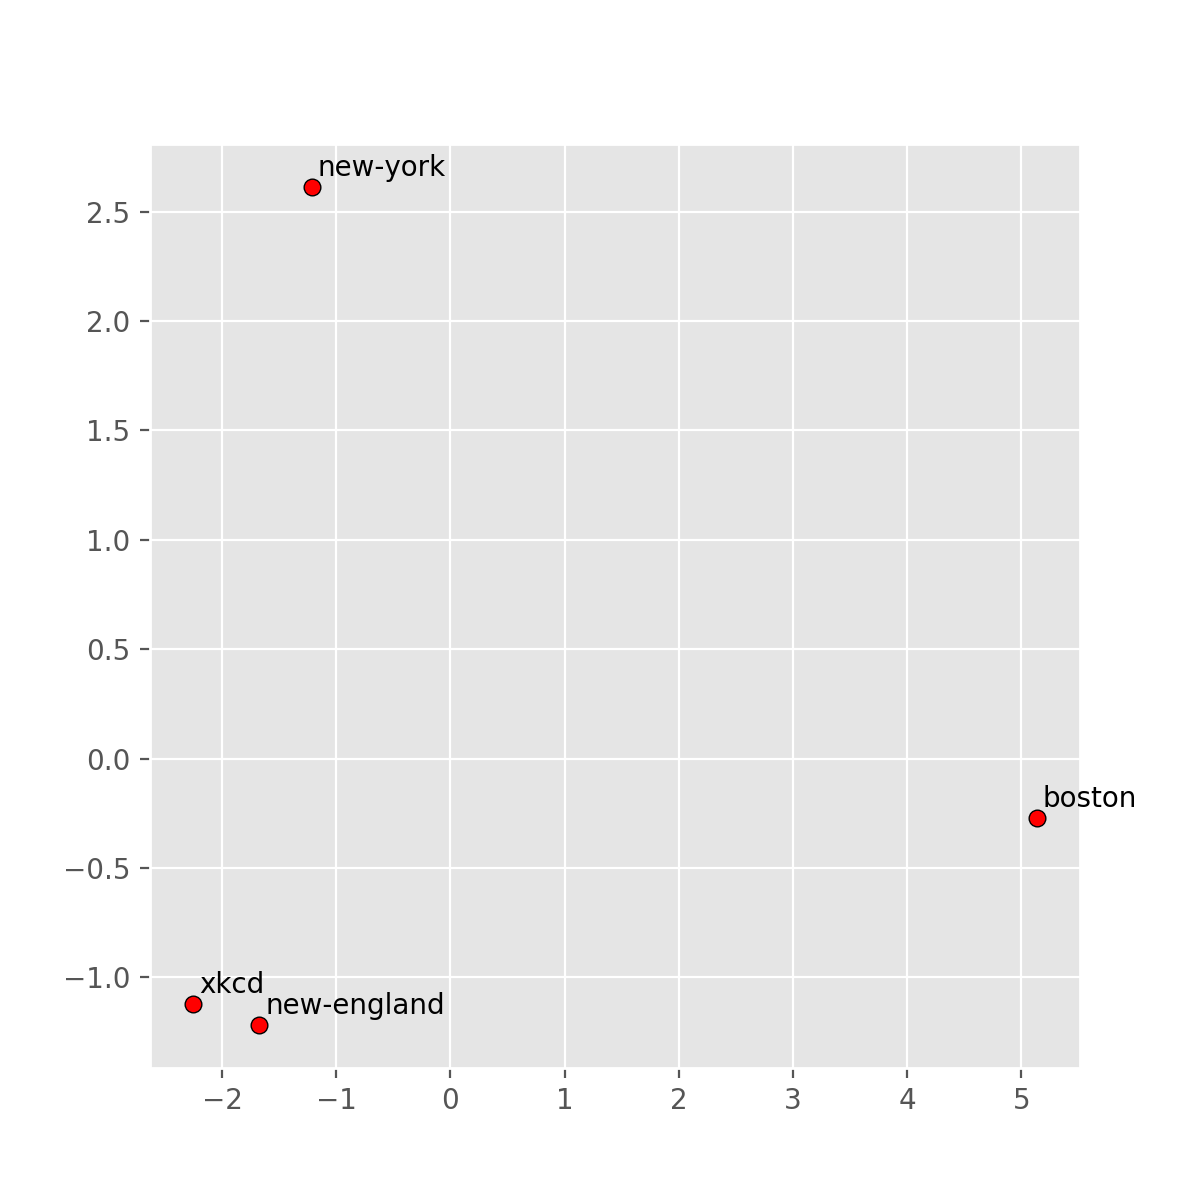

In [49]:
#Scatterplot of Analogy 1
display_pca_scatterplot(model,analogy1_list)

<IPython.core.display.Javascript object>


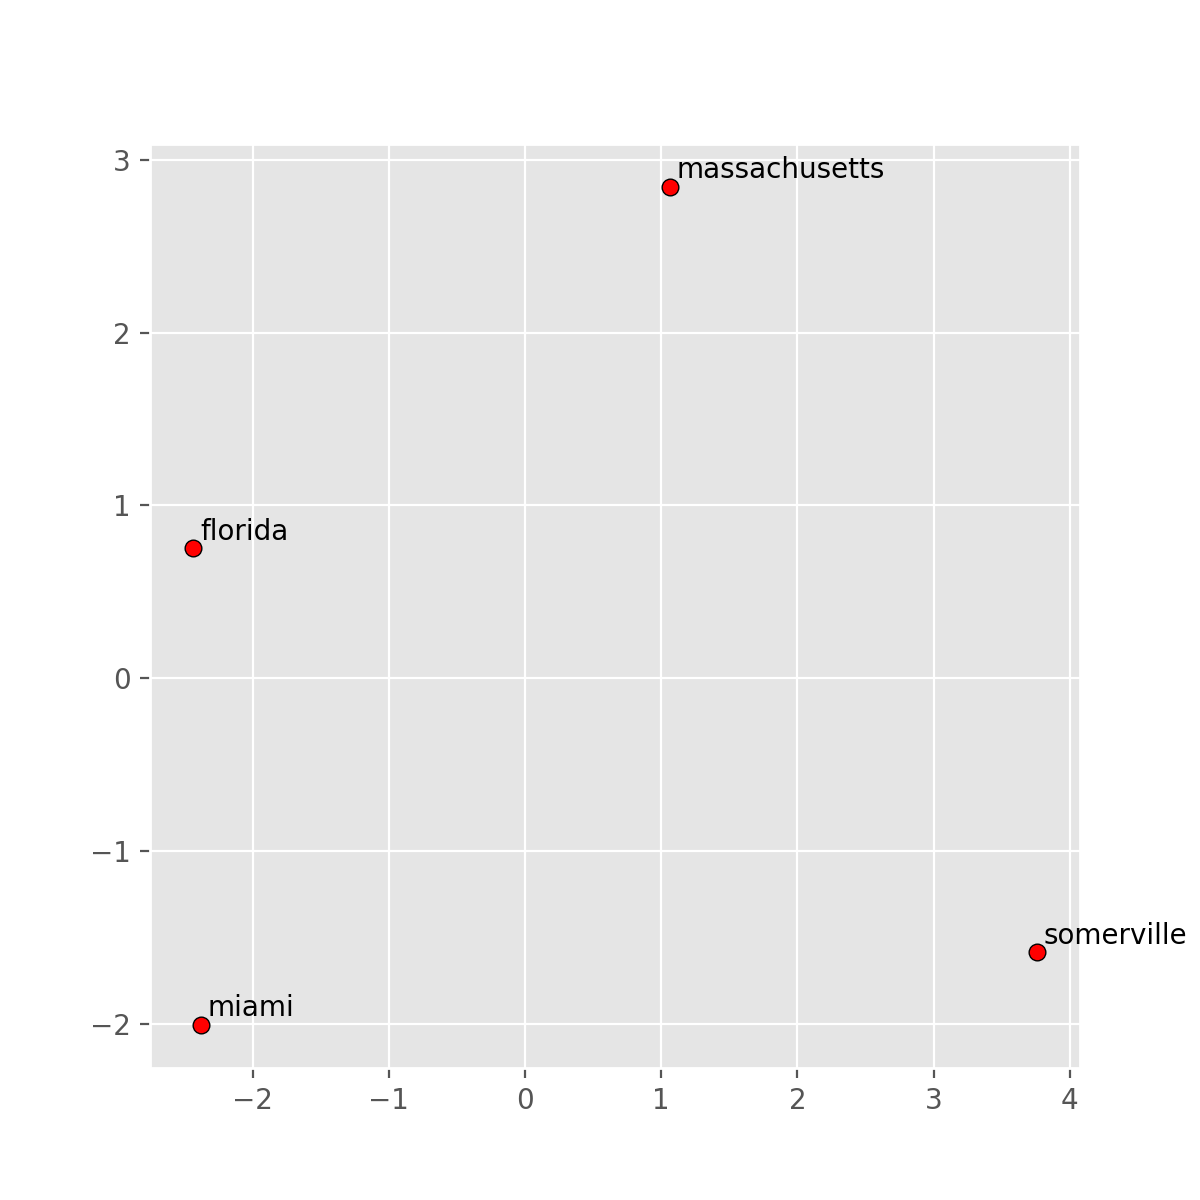

In [50]:
#Scatterplot 2
display_pca_scatterplot(model,analogy2_list)

<IPython.core.display.Javascript object>


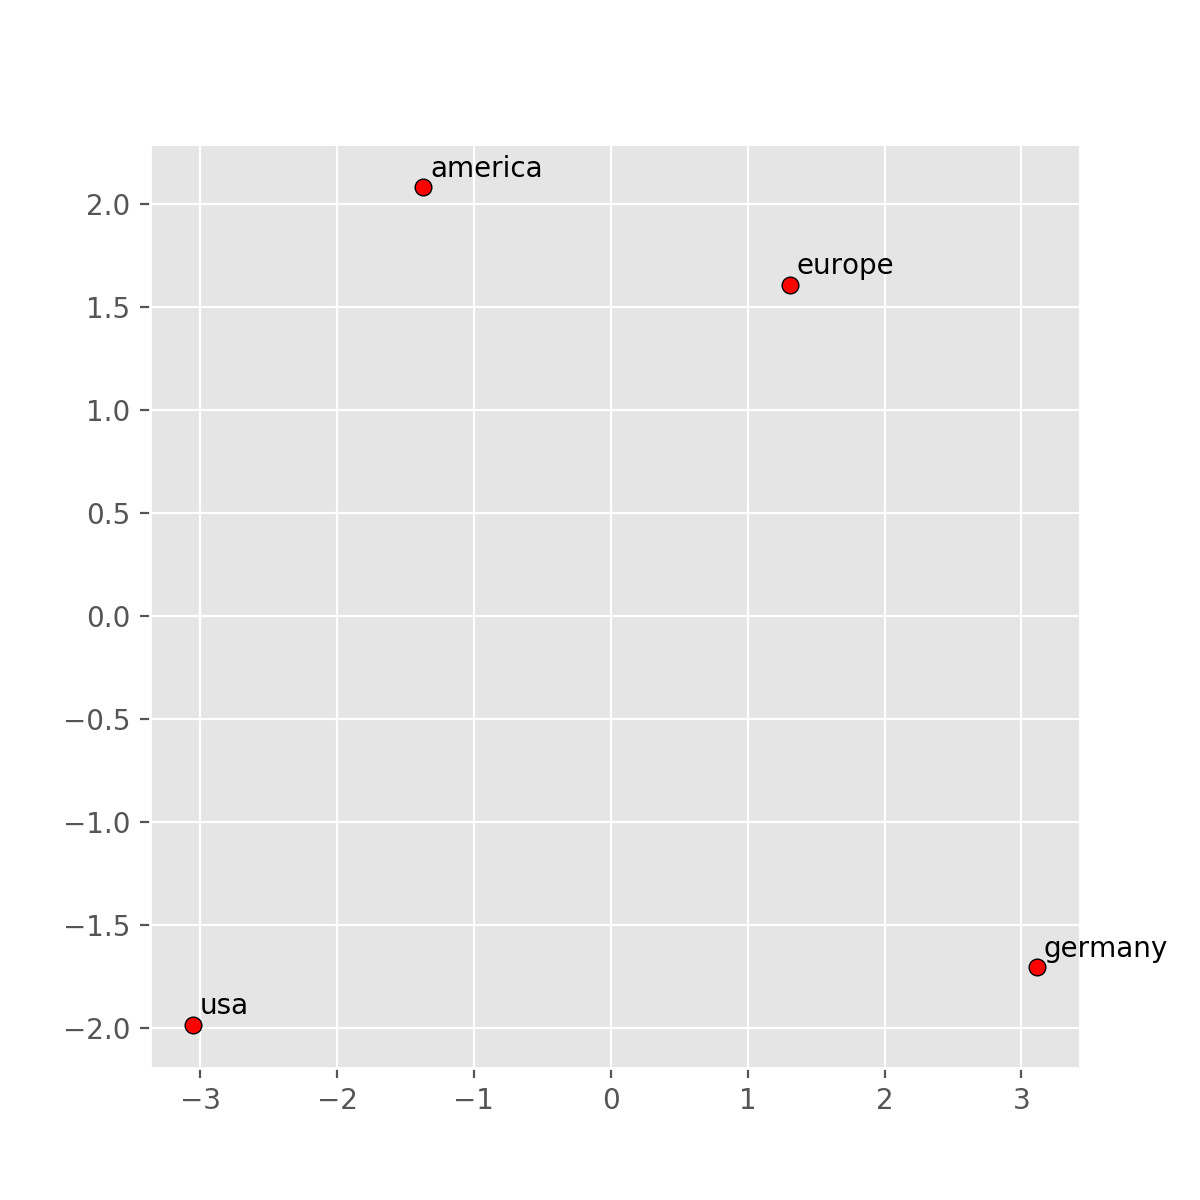

In [51]:
#Scatterplot 3
display_pca_scatterplot(model,analogy3_list)

<IPython.core.display.Javascript object>


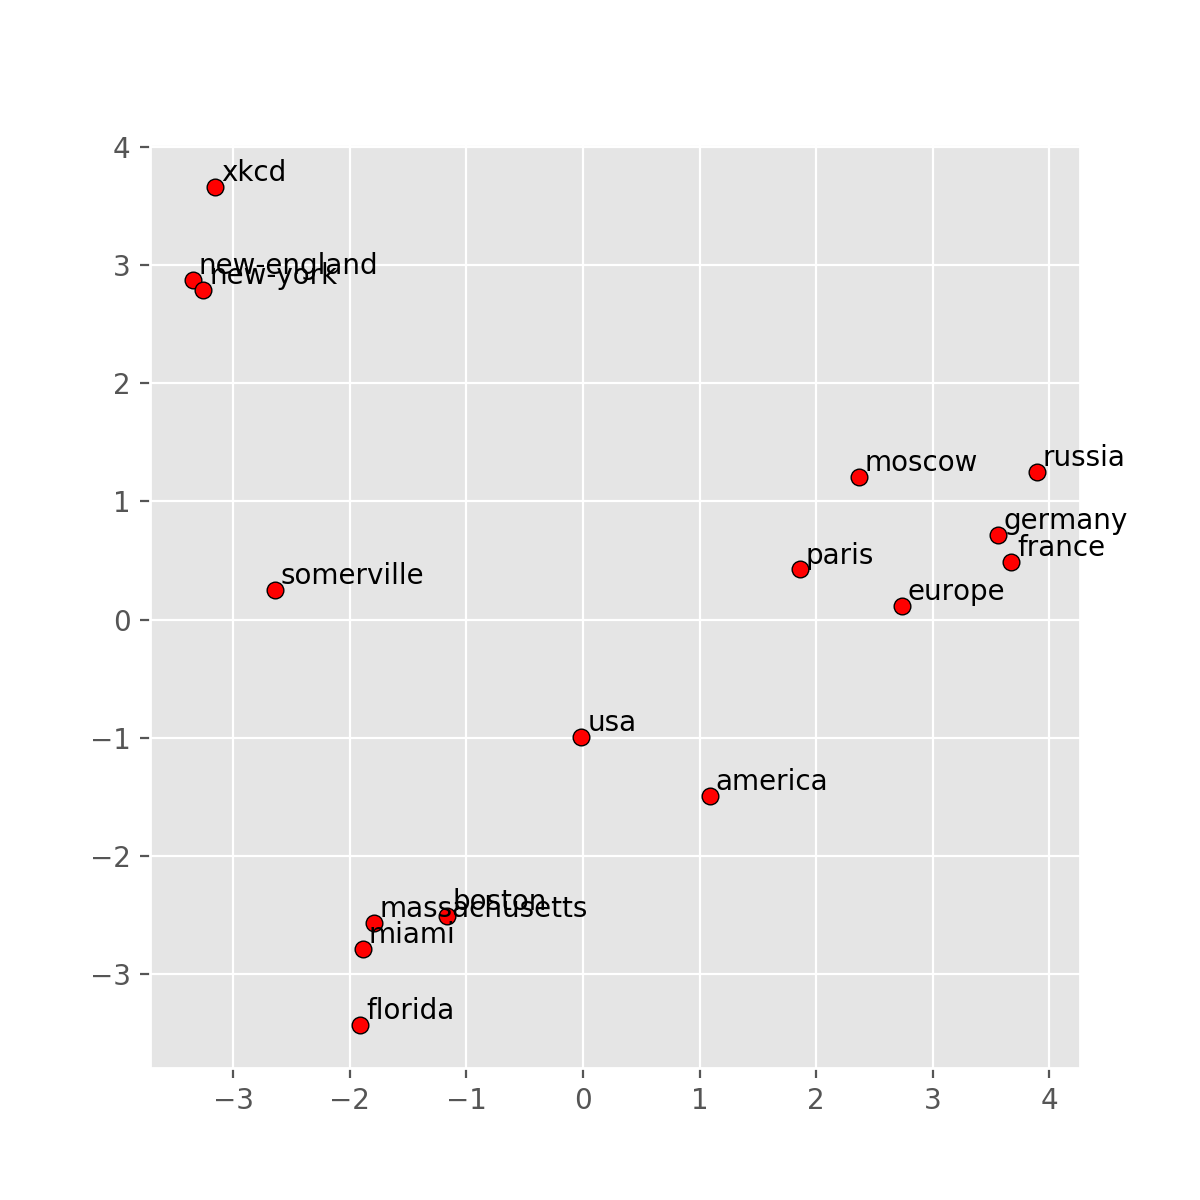

In [52]:
#Joined List on one PCA
display_pca_scatterplot(model,joined_list)

<b>Problem 2.</b> Repeat the above experiment with 300-dimensional Glove vectors transformed into Word2Vec format. We are curious whether the shape of above geometric shapes are preserved or modified in the higher dimensional space. Use PCA to make the projections. (20%)

In [53]:
#Replace the 100-dimensional Glove with a 300-dimensional Glove
glove_file = datapath('/Users/jlee/Documents/GitHub/Python-Practice/Harvard CSCI E-63/glove/glove.6B.300d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.300d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

/Users/jlee/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [54]:
#Create analogies, then find the analogy and then append it to a new list

#Analogy 1: City to Region
analogy1 = analogy('boston','new-england','new-york')
print("Analogy 1: boston is to new england as new york is to",analogy1)
analogy1_list = ['boston','new-england','new-york',analogy1]

#Analogy 2: City to State
analogy2 = analogy('miami','florida','somerville')
print("Analogy 2: miami is to florida as somerville is to", analogy2)
analogy2_list = ['miami','florida','somerville',analogy2]

#Analogy 3: Country to Continent
analogy3 = analogy('germany','europe','usa')
print("Analogy 3: germany is to europe as usa is to",analogy3)
analogy3_list = ['germany','europe','usa',analogy3]

joined_list = analogy1_list + analogy2_list + analogy3_list + original_list 

Analogy 1: boston is to new england as new york is to _____________
Analogy 2: miami is to florida as somerville is to massachusetts
Analogy 3: germany is to europe as usa is to america


<b><i>Observations</b></i>

<i>Analogy 1: </i> Boston is to New England as New York is to X, we see that "____________" is chosen with the 300 Dimensional Glove - which may mean that there is no appropriate word. I would gather that this is another potential inaccuracy of Gensim adding on to the last analogy of XKCD. We no longer see the trapezoid but a triangle form. 

<i>Analogy 2: </i> Miami is to Florida as Somerville is to X, we see that Massachusetts is still chosen with the 300 Dimensional Glove.

<i>Analogy 3: </i> Germany is to Europe as USA is to is to X, we see that America is still chosen with the 300 Dimensional Glove.

<i>Overall: </i> We still see similar clusters form here.

<IPython.core.display.Javascript object>


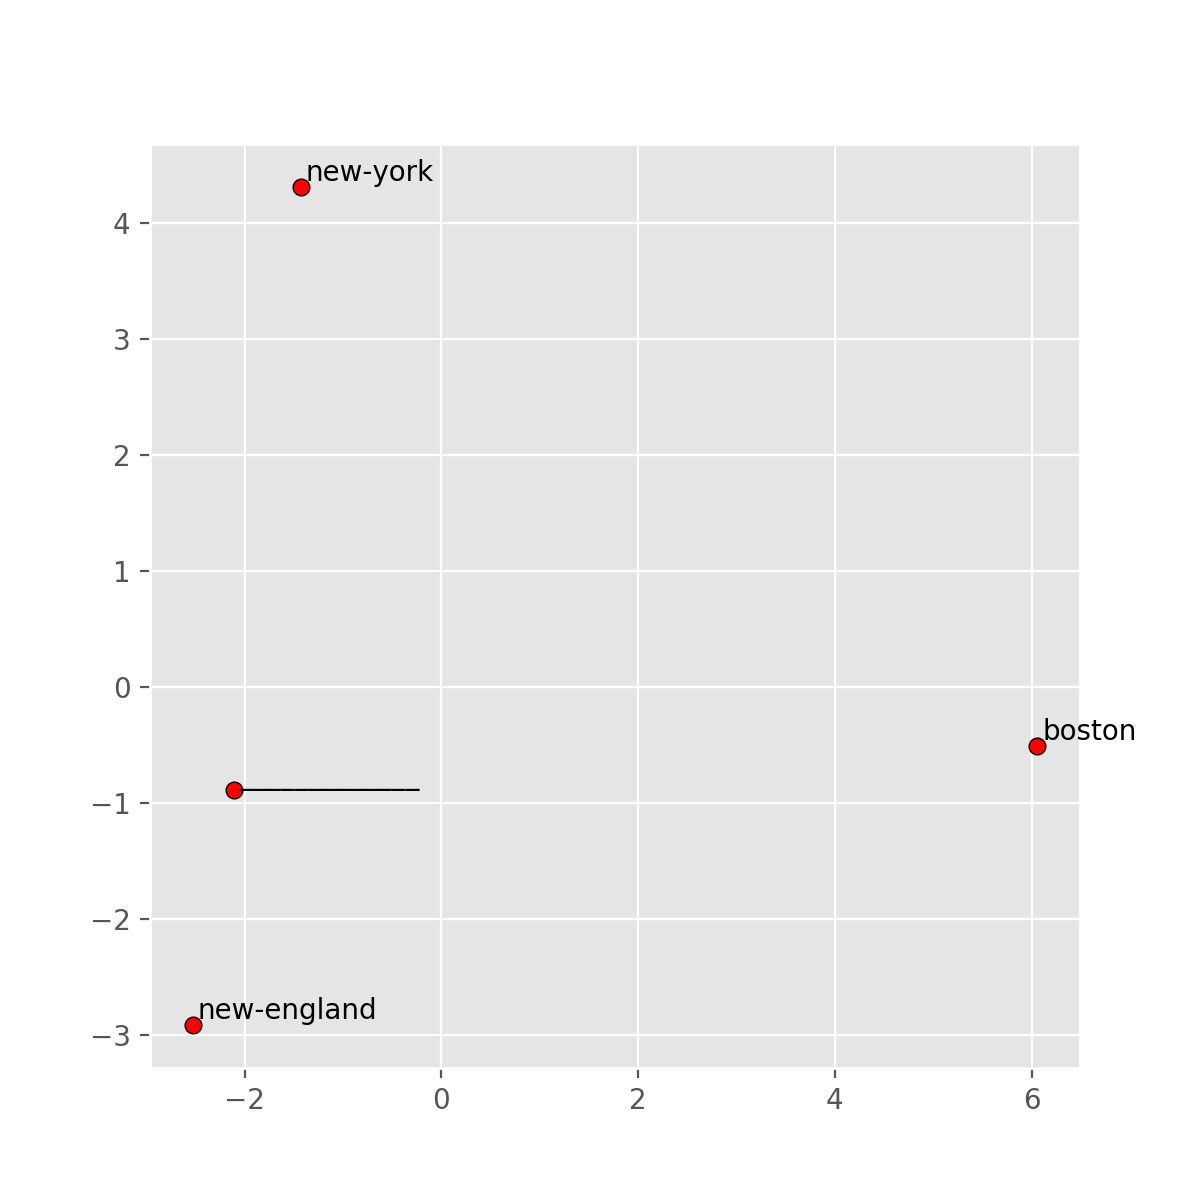

In [55]:
#Scatterplot of Analogy 1
display_pca_scatterplot(model,analogy1_list)

<IPython.core.display.Javascript object>


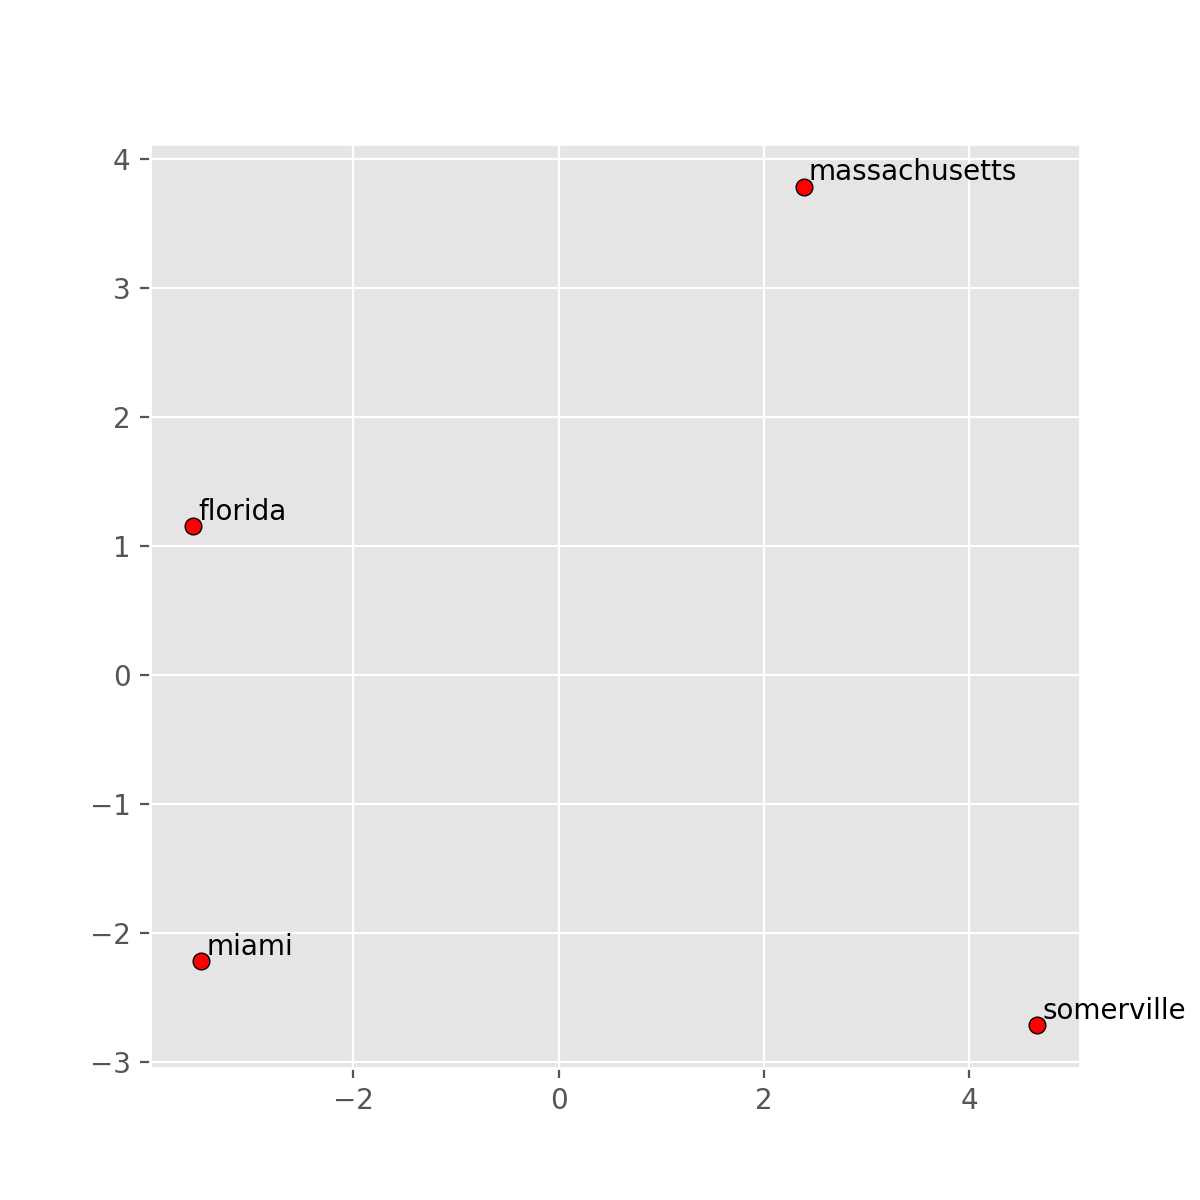

In [56]:
#Scatterplot 2
display_pca_scatterplot(model,analogy2_list)

<IPython.core.display.Javascript object>


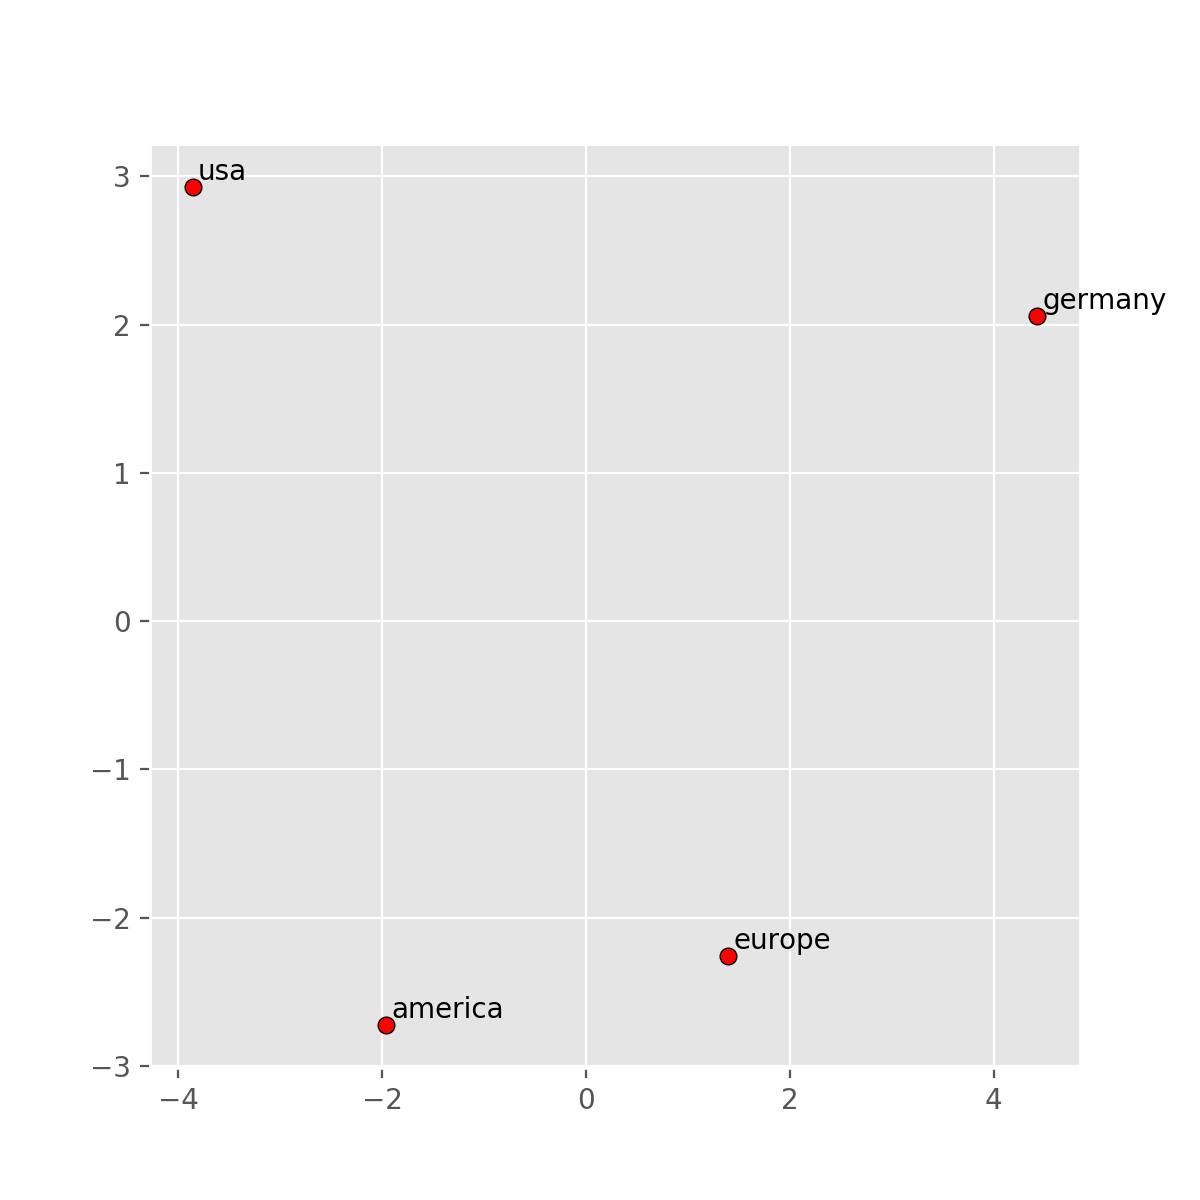

In [57]:
#Scatterplot 3
display_pca_scatterplot(model,analogy3_list)

<IPython.core.display.Javascript object>


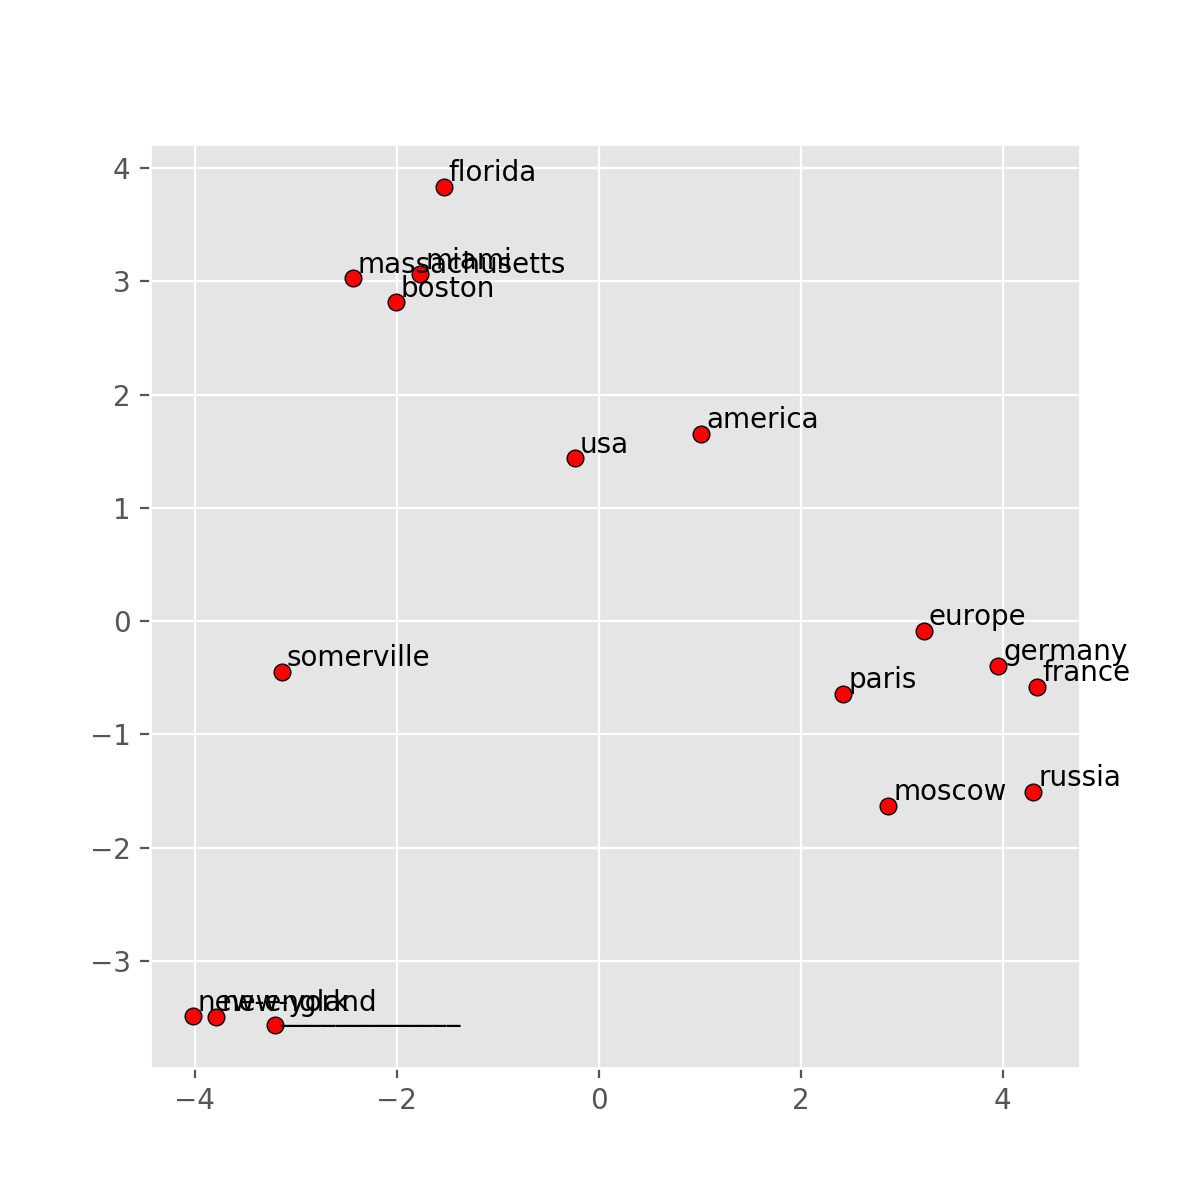

In [58]:
#Joined List on one PCA
display_pca_scatterplot(model,joined_list)

<b>Problem 3.</b> Repeat the above experiment from problem 1 using Sci-kit Learn T-SNE projections, rather than PCA. (10%)

In [61]:
import sklearn
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)

In [62]:
analogy1 = analogy('boston','new-england','new-york')

AttributeError: 'TSNE' object has no attribute 'most_similar'

<b> Problem 4. </b> Try to use the simplest architecture we discussed in Lecture 4 with two Dense layers to create a de-noising autoencoder. Use the latent space of dimension 64. Report on your findings. (25%)

<b> Problem 5. </b> Consider image denoising auto decoder described on slide 54 of the notes for Lecture 4. Make an experiment by reducing the number of filters (channels) contained in all Conv2D layers from 32 to 16. Compare results of autoencoders with 32 and 16 channels visually. Could you come up with a technique to compare the quality of denoising more accurately. In either case present the effect of removing noise from handwritten digits 3, 6, and 8 (25%)